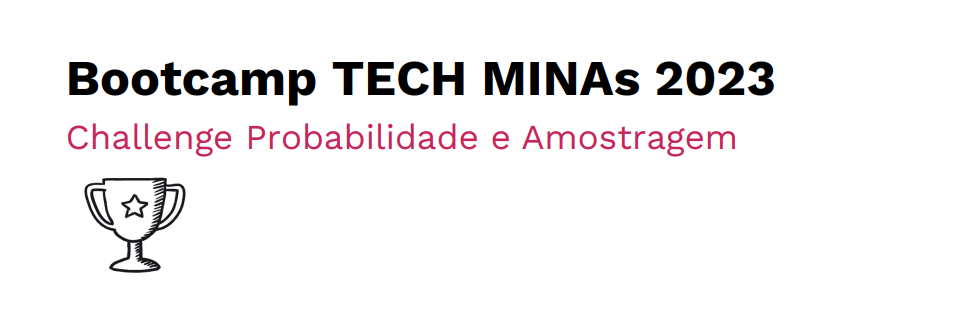

# Desafio 1: Entendendo o consumidor.

Suponha que você trabalha em uma empresa de produtos de beleza populares e, com
a pandemia, você suspeita que o perfil de seus clientes mudou. O time de marketing,
pediu a sua ajuda e gostaria de entender se 1. isso de fato aconteceu e 2. quais as
diferenças do novo perfil de clientes para o antigo, pois assim poderiam personalizar
melhor os seus anúncios. 

Para isso, eles te enviaram a base de dados
(desafio_01_consumidor.csv). Como você poderia ajudá-los?

Para responder esse desafio:
A base de dados: desafio_01_consumidor.csv contém informações de seus clientes
(anonimizados) no período pré e pós pandemia. A coluna "pré-pandemia" indica se o
dado é pré-pandemia ou não, sendo 1, caso positivo ou 0 caso negativo.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm

In [2]:
dados = pd.read_csv('desafio01consumidor.csv')

In [4]:
dados.head()

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


In [9]:
dados.shape

(203, 6)

### 1. Entenda a distribuição de variáveis como de idade / renda / regiao / produtos mais comprados antes e depois da pandemia

a. Identifique as distribuições

b. Plote histogramas / boxplots


In [21]:
media_idade = dados['idade'].mean()
print(f'A idade média desse grupo é {int(media_idade)} anos.')

A idade média desse grupo é 42 anos.


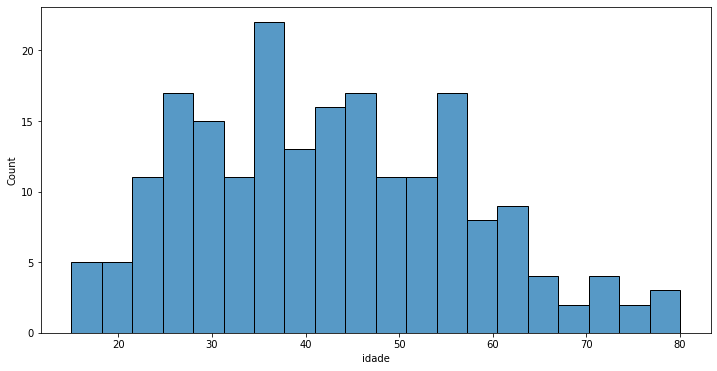

In [47]:
ax = sns.histplot(x = 'idade', data=dados, bins = 20)
ax.figure.set_size_inches(12,6)

In [17]:
media_renda = dados['renda'].mean()
print(f'A renda média desse grupo é R$ {int(media_renda)}.')

A renda média desse grupo é R$ 11586.


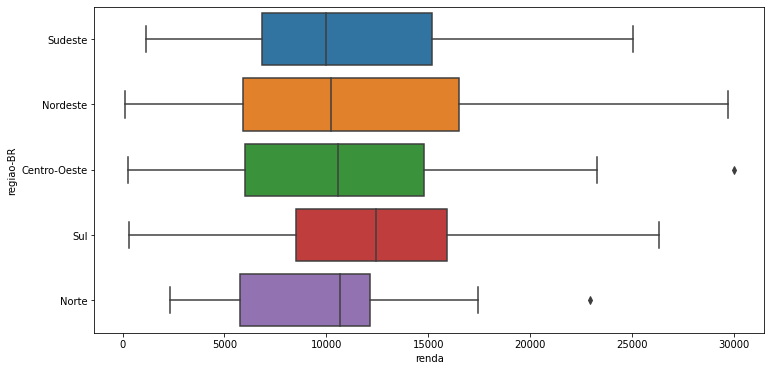

In [46]:
ax = sns.boxplot(x = 'renda', y= 'regiao-BR', data=dados, orient = 'h')
ax.figure.set_size_inches(12,6)

In [24]:
qnt_pandemia = dados['pre-pandemia'].value_counts()
print(f'Há {qnt_pandemia[0]} consumidores pós pandemia e {qnt_pandemia[1]} consumidores pré pandemia.')

Há 102 consumidores pós pandemia e 101 consumidores pré pandemia.


In [40]:
freq_prod_pandemia = pd.crosstab(dados['produto'],
                         dados['pre-pandemia'])
freq_prod_pandemia.rename(columns = {0: 'não', 1: 'sim'}, inplace=True)
freq_prod_pandemia

pre-pandemia,não,sim
produto,,
antissinais,20,9
base,4,3
batom,15,61
desodorante,46,20
perfume,8,4
sombra,9,4


In [42]:
per_prod_pandemia = pd.crosstab(dados['produto'],
                                dados['pre-pandemia'],
                                normalize = True) * 100
per_prod_pandemia.rename(columns = {0: 'não', 1: 'sim'}, inplace=True)
per_prod_pandemia

pre-pandemia,não,sim
produto,,
antissinais,9.852217,4.433498
base,1.970443,1.477833
batom,7.389163,30.049261
desodorante,22.660099,9.852217
perfume,3.940887,1.970443
sombra,4.433498,1.970443


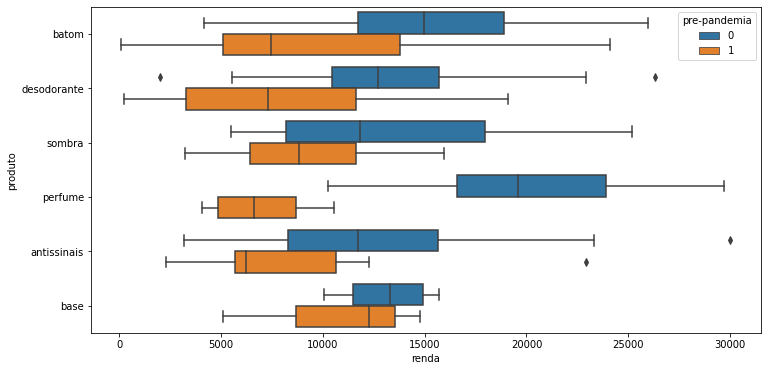

In [49]:
ax = sns.boxplot(x = 'renda', y= 'produto', hue='pre-pandemia', data=dados, orient = 'h')
ax.figure.set_size_inches(12,6)

### 2. Você notou diferenças nítidas pré e pós pandemia? Como você poderia provar estatisticamente que essas diferenças são significativas ? (pergunta extra)


No período pré pandemia, o produto mais vendido era o batom. No pós, um produto que antes não era vendido, o perfume, passou a ser o líder de vendas. Além disso, agora há um maior balanceamento entre os produtos. É possível ver isso na tabela de frequências e percentual realizada acima.  

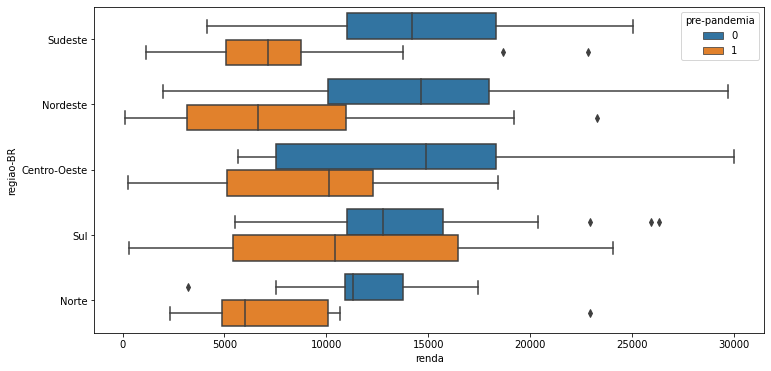

In [52]:
ax = sns.boxplot(x = 'renda', y = 'regiao-BR', data=dados, hue='pre-pandemia')
ax.figure.set_size_inches(12,6)

In [57]:
dados.groupby(by='pre-pandemia').mean()

,idade,renda
pre-pandemia,,
0,44.901961,13968.500000
1,39.881188,9180.643564


O perfil de renda de cliente também se alterou. No pós pandemia, os consumidores têm uma renda média próxima dos R$ 14.000, aumentando a mesma, que era de R 9.000. A idade passou dos 40 para os 45 anos.

### 3. Suponha agora que os dados recebidos são somente uma amostra da sua população total de clientes. Suponha que a sua "população" de clientes verdadeira é de 100000. Qual o tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A base informada é suficiente? E com uma margem de erro de 10%?

In [60]:
desvio_padrao = dados['renda'].std()
desvio_padrao

6288.0167075146455

In [67]:
media = dados['renda'].mean()
media

11586.364532019705

In [72]:
e = 0.02 * media
e

231.7272906403941

In [71]:
z = norm.ppf(0.5 + (0.95 / 2))
confianca = (z * (desvio_padrao / e) ** 2)
print(f'A amostra para 2% de margem de erro precisaria ser com {int(confianca)} clientes.')

A amostra para 2% de margem de erro precisaria ser com 1443 clientes.


In [73]:
e = 0.1 * media
e

1158.6364532019704

In [75]:
z = norm.ppf(0.5 + (0.95 / 2))
confianca = (z * (desvio_padrao / e) ** 2)
print(f'A amostra para 10% de margem de erro precisaria ser com {int(confianca)} clientes.')

A amostra para 10% de margem de erro precisaria ser com 57 clientes.


# Desafio 2: Determinando o Estoque de Segurança.

Suponha agora que você trabalha em uma empresa de produtos perecíveis, como
Danone ou Nestlé. Para a empresa, é muito importante que a sua política de estoque
seja eficiente. É necessário manter um estoque de segurança em todos os produtos
(acima da previsão de vendas), pois, caso contrário, as pessoas podem não encontrar
os produtos no supermercado. 

Mas, ao mesmo tempo, se o estoque estiver em
excesso, isso pode representar um grande custo. Os produtos podem não ser
comprados, e consequentemente, jogados fora, o que na indústria se chama
"desova".


Para achar o equilíbrio perfeito, o gerente de vendas pediu a ajuda a você, do time de
análise de dados, e ele gostaria de saber qual o estoque de segurança ideal.

In [77]:
dados = pd.read_csv('desafio_02_estoque.csv')

In [80]:
dados.head()

,data,vendas-iogurte,lead-time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5


### 1. Analise os dados das vendas e do lead time. Eles seguem uma distribuição normal? Que características você identificou para chegar a essa conclusão?

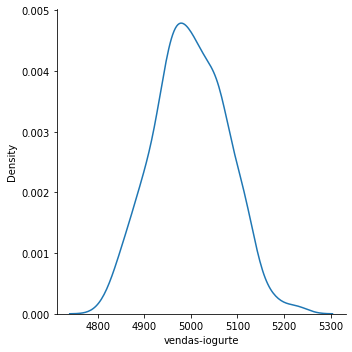

In [84]:
sns.displot(data=dados, x = 'vendas-iogurte', kind='kde')

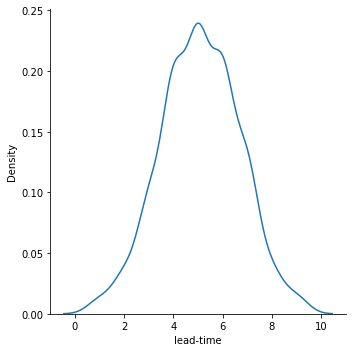

In [85]:
sns.displot(data=dados, x = 'lead-time', kind='kde')

In [92]:
media = dados['lead-time'].mean()
moda = dados['lead-time'].mode()
mediana = dados['lead-time'].median()
print(f'Tem os valores de média: {int(media)}, moda: {int(moda)}, mediana: {mediana}.')

Tem os valores de média: 5, moda: 5, mediana: 5.0


In [93]:
media = dados['vendas-iogurte'].mean()
moda = dados['vendas-iogurte'].mode()
mediana = dados['vendas-iogurte'].median()
print(f'Tem os valores de média: {int(media)}, moda: {int(moda)}, mediana: {mediana}.')

Tem os valores de média: 4999, moda: 5020, mediana: 4996.0.


Os dados indicam que sim, a distribuição é normal. Os valores de média, moda e mediana são bem próximas tanto das vendas de iogurte quando lead time. Tem uma simetria em torno da média e os extremos da curva tendem ao infinito, não tocando o eixo X. 

### 2. Assuma que:
a. Os dados seguem uma distribuição normal.


b. O time de vendas utilize para o produto em questão o nível de serviço
de 99,87%


c. O produto não tem sazonalidade (todos os meses vende valores
próximos) e a demanda média passada é uma boa estimativa para a
projetada, de acordo com o time de planejamento de demanda.

Calcule, com os dados fornecidos, o estoque de segurança desejado.

In [95]:
desvio_padrao = dados['vendas-iogurte'].std()
desvio_padrao

77.28506821873455

In [97]:
media_time = dados['lead-time'].mean()
media_time

5.094594594594595

In [98]:
media_vendas = dados['vendas-iogurte'].mean()
media_vendas

4999.1702702702705

In [99]:
z = norm.ppf(0.5 + (0.9987 / 2))
z

3.21597976078809

In [103]:
estoque_seguranca = z * np.sqrt((desvio_padrao ** 2) * media_time)
print(f'Para um nível de serviço de 99.87%, o estoque de segurança desejado é {int(estoque_seguranca.round())}.')

Para um nível de serviço de 99.87%, o estoque de segurança desejado é 561
